In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Helper functions

In [63]:
def add_prefix(prefix, labels):
    return [prefix + label for label in labels]

def add_prefixes(prefixes, labels):
    return [prefix + label for label in labels for prefix in prefixes]

## Import dataset

In [3]:
signal_path = '../data/signal.pkl'
signal = pd.read_pickle(signal_path)

## Organise columns

In [13]:
column_labels = list(signal.columns)
list(zip(range(len(column_labels)), column_labels))

[(0, 'mu_plus_MC15TuneV1_ProbNNk'),
 (1, 'mu_plus_MC15TuneV1_ProbNNpi'),
 (2, 'mu_plus_MC15TuneV1_ProbNNmu'),
 (3, 'mu_plus_MC15TuneV1_ProbNNe'),
 (4, 'mu_plus_MC15TuneV1_ProbNNp'),
 (5, 'mu_plus_P'),
 (6, 'mu_plus_PT'),
 (7, 'mu_plus_ETA'),
 (8, 'mu_plus_PHI'),
 (9, 'mu_plus_PE'),
 (10, 'mu_plus_PX'),
 (11, 'mu_plus_PY'),
 (12, 'mu_plus_PZ'),
 (13, 'mu_plus_IPCHI2_OWNPV'),
 (14, 'mu_minus_MC15TuneV1_ProbNNk'),
 (15, 'mu_minus_MC15TuneV1_ProbNNpi'),
 (16, 'mu_minus_MC15TuneV1_ProbNNmu'),
 (17, 'mu_minus_MC15TuneV1_ProbNNe'),
 (18, 'mu_minus_MC15TuneV1_ProbNNp'),
 (19, 'mu_minus_P'),
 (20, 'mu_minus_PT'),
 (21, 'mu_minus_ETA'),
 (22, 'mu_minus_PHI'),
 (23, 'mu_minus_PE'),
 (24, 'mu_minus_PX'),
 (25, 'mu_minus_PY'),
 (26, 'mu_minus_PZ'),
 (27, 'mu_minus_IPCHI2_OWNPV'),
 (28, 'K_MC15TuneV1_ProbNNk'),
 (29, 'K_MC15TuneV1_ProbNNpi'),
 (30, 'K_MC15TuneV1_ProbNNmu'),
 (31, 'K_MC15TuneV1_ProbNNe'),
 (32, 'K_MC15TuneV1_ProbNNp'),
 (33, 'K_P'),
 (34, 'K_PT'),
 (35, 'K_ETA'),
 (36, 'K_PHI'),
 (37

In [28]:
charged_prods = ['mu_plus', 'mu_minus', 'K', 'Pi']
charged_prods_vars = [x[7:] for x in column_labels[:14]]
charged_prods_vars

['_MC15TuneV1_ProbNNk',
 '_MC15TuneV1_ProbNNpi',
 '_MC15TuneV1_ProbNNmu',
 '_MC15TuneV1_ProbNNe',
 '_MC15TuneV1_ProbNNp',
 '_P',
 '_PT',
 '_ETA',
 '_PHI',
 '_PE',
 '_PX',
 '_PY',
 '_PZ',
 '_IPCHI2_OWNPV']

In [29]:
neutral_prods = ['B0', 'Kstar', 'J_psi']
neutral_prods_vars = [x[2:] for x in column_labels[56:60]]
neutral_prods_vars

['_MM', '_ENDVERTEX_CHI2', '_ENDVERTEX_NDOF', '_FDCHI2_OWNPV']

In [23]:
collision_vars = column_labels[68:72]
collision_vars

['q2', 'phi', 'costhetal', 'costhetak']

In [6]:
signal.describe()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,costhetal,costhetak,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,polarity
count,255741.000000,2.557410e+05,255741.000000,2.557410e+05,2.557410e+05,255741.000000,255741.000000,255741.000000,255741.000000,255741.000000,...,255741.000000,255741.000000,2.557410e+05,255741.000000,255741.000000,255741.000000,255741.000000,255741.000000,255741.000000,255741.0
mean,0.013595,9.562098e-02,0.976439,1.957014e-04,4.924935e-03,48331.649222,3719.337613,3.105193,0.007825,48331.878412,...,0.196761,-0.083291,2.053210e+00,0.999994,0.839591,-0.179825,-2.861145,16.919676,3.230952,1.0
std,0.047593,1.411314e-01,0.066199,5.755231e-03,3.209205e-02,47597.542616,2797.635617,0.635522,1.807695,47597.427162,...,0.504987,0.587025,2.167750e+00,0.000012,0.032444,0.032290,40.725871,18.175228,510.990785,0.0
min,0.000003,1.422406e-07,0.006716,4.295190e-13,6.165772e-10,3004.490000,1000.001360,1.595753,-3.141459,3006.347261,...,-0.999933,-0.999990,6.596602e-07,0.999900,0.649000,-0.379300,-179.355400,0.709766,-511.000000,1.0
25%,0.000097,1.261968e-02,0.983873,9.450801e-07,1.178952e-06,18695.370000,1908.616064,2.609444,-1.552530,18695.668566,...,-0.191602,-0.616199,5.602539e-01,0.999995,0.817900,-0.201400,-30.309100,6.235717,-511.000000,1.0
50%,0.000524,3.889293e-02,0.995364,2.585535e-06,1.402105e-05,33775.850000,2912.548220,3.069335,0.022436,33776.015261,...,0.238716,-0.122338,1.364511e+00,0.999999,0.839600,-0.179800,-2.898300,11.287896,511.000000,1.0
75%,0.005866,1.108424e-01,0.998658,7.539855e-06,6.534957e-04,60770.500000,4581.652089,3.562642,1.568503,60770.591851,...,0.625631,0.434922,2.790996e+00,1.000000,0.861300,-0.158200,24.578200,20.769641,511.000000,1.0
max,0.969063,9.854474e-01,1.000000,9.932488e-01,9.862214e-01,927160.430000,74411.337337,5.095064,3.141437,927160.436020,...,0.999983,0.999993,1.599846e+01,1.000000,1.020300,-0.002900,171.913500,418.943673,511.000000,1.0


In [24]:
signal[['polarity', 'q2']].describe()

,polarity,q2
count,255741.0,255741.000000
mean,1.0,9.746009
std,0.0,5.322648
min,1.0,0.044967
25%,1.0,5.803496
50%,1.0,10.501237
75%,1.0,14.056658
max,1.0,20.520857


In [7]:
signal.head()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,costhetak,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,polarity,year
0,0.001626,0.368621,0.965144,0.000002,0.000068,28796.58,2531.302013,3.122733,-2.023842,28796.773836,...,-0.885188,4.304049,0.999999,0.7708,-0.2054,40.5605,27.879712,511,1,2016
1,0.000075,0.008453,0.998412,0.000005,0.000001,24673.47,2274.749879,3.074874,-1.014814,24673.696228,...,-0.133953,1.159875,0.999999,0.7926,-0.1152,-1.7938,12.678658,-511,1,2016
2,0.000051,0.007129,0.998914,0.000007,0.000001,28464.70,3379.198551,2.820631,-2.119273,28464.896096,...,0.741662,4.786264,0.999997,0.8396,-0.2445,53.8937,12.155244,511,1,2016
3,0.006548,0.088188,0.949859,0.000007,0.005321,11540.26,1048.238326,3.089809,-0.829094,11540.743674,...,0.150085,2.156253,1.000000,0.8143,-0.1723,32.0894,21.083577,-511,1,2016
4,0.000130,0.041185,0.992115,0.000003,0.000004,8605.87,1542.434031,2.404101,-2.030454,8606.518585,...,-0.998332,1.590714,0.999938,0.8220,-0.1640,-9.6481,1.710604,511,1,2016


## Import rest of datasets

In [35]:
data_path = '../data/'
jpsi_path = f'{data_path}jpsi.pkl' 
psi2S_path = f'{data_path}psi2S.pkl' 
jpsi_mu_k_swap_path = f'{data_path}jpsi_mu_k_swap.pkl' 
jpsi_mu_pi_swap_path = f'{data_path}jpsi_mu_pi_swap.pkl' 
k_pi_swap_path = f'{data_path}k_pi_swap.pkl' 
phimumu_path = f'{data_path}phimumu.pkl' 
pKmumu_piTok_kTop_path = f'{data_path}pKmumu_piTok_kTop.pkl' 
pKmumu_piTop_path = f'{data_path}pKmumu_piTop.pkl' 

jpsi               = pd.read_pickle(jpsi_path)
psi2S              = pd.read_pickle(psi2S_path)
jpsi_mu_k_swap     = pd.read_pickle(jpsi_mu_k_swap_path)
jpsi_mu_pi_swap    = pd.read_pickle(jpsi_mu_pi_swap_path)
k_pi_swap          = pd.read_pickle(k_pi_swap_path)
phimumu            = pd.read_pickle(phimumu_path)
pKmumu_piTok_kTop  = pd.read_pickle(pKmumu_piTok_kTop_path)
pKmumu_piTop       = pd.read_pickle(pKmumu_piTop_path)

In [38]:
decay_names = ['signal', 'jpsi', 'psi2S', 'jpsi_mu_k_swap', 'jpsi_mu_pi_swap', 
               'k_pi_swap', 'phimumu', 'pKmumu_piTok_kTop', 'pKmumu_piTop']
decay_datasets = {name: eval(name) for name in decay_names}

## Whisker plot of vars

In [78]:
def plot_whisker(var, datasets=decay_datasets, names=decay_names):
    plt.boxplot([datasets[name][var] for name in names], labels=names, vert=False, showfliers=False)
    
def plot_whiskers_grid(all_vars, n_rows, n_cols):
    for i, var in enumerate(all_vars):
        plt.subplot(n_rows, n_cols, i+1)
        plt.title(var)
        plot_whisker(var)
        
        if i % n_cols != 0:
            plt.yticks([])

def plot_whiskers_vars(prefixes, labels):
    all_vars = add_prefixes(prefixes, labels)
    plot_whiskers_grid(all_vars, len(labels), len(prefixes))

In [87]:
save_dir = './graphs/'

### General

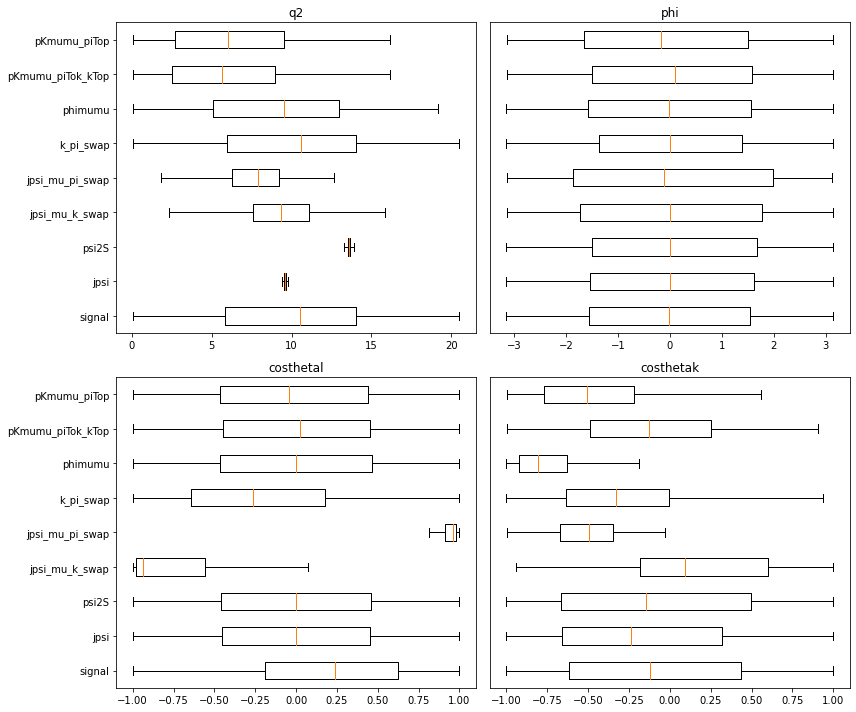

In [96]:
plt.figure(figsize=(12, 10))
plot_whiskers_grid(collision_vars, 2, 2)

plt.tight_layout()
plt.savefig(save_dir + 'general.pdf')

### Neutral products

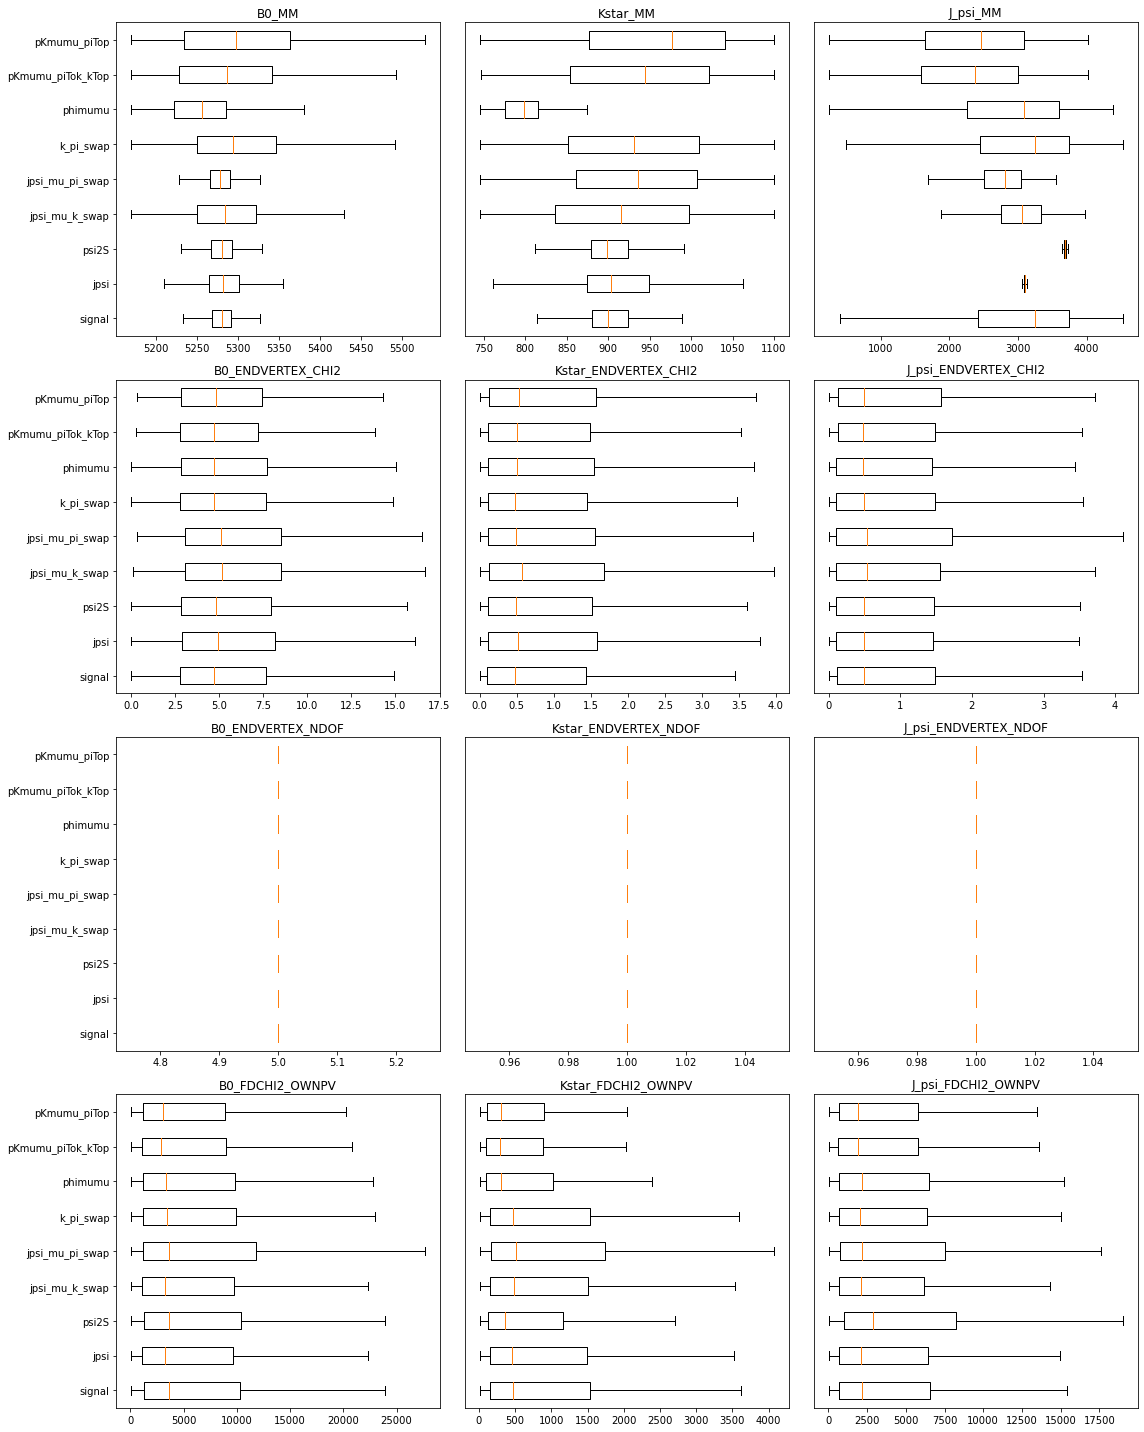

In [90]:
plt.figure(figsize=(16, 20))
plot_whiskers_vars(neutral_prods, neutral_prods_vars)

plt.tight_layout()
plt.savefig(save_dir + 'neutral.pdf')

### Charged products

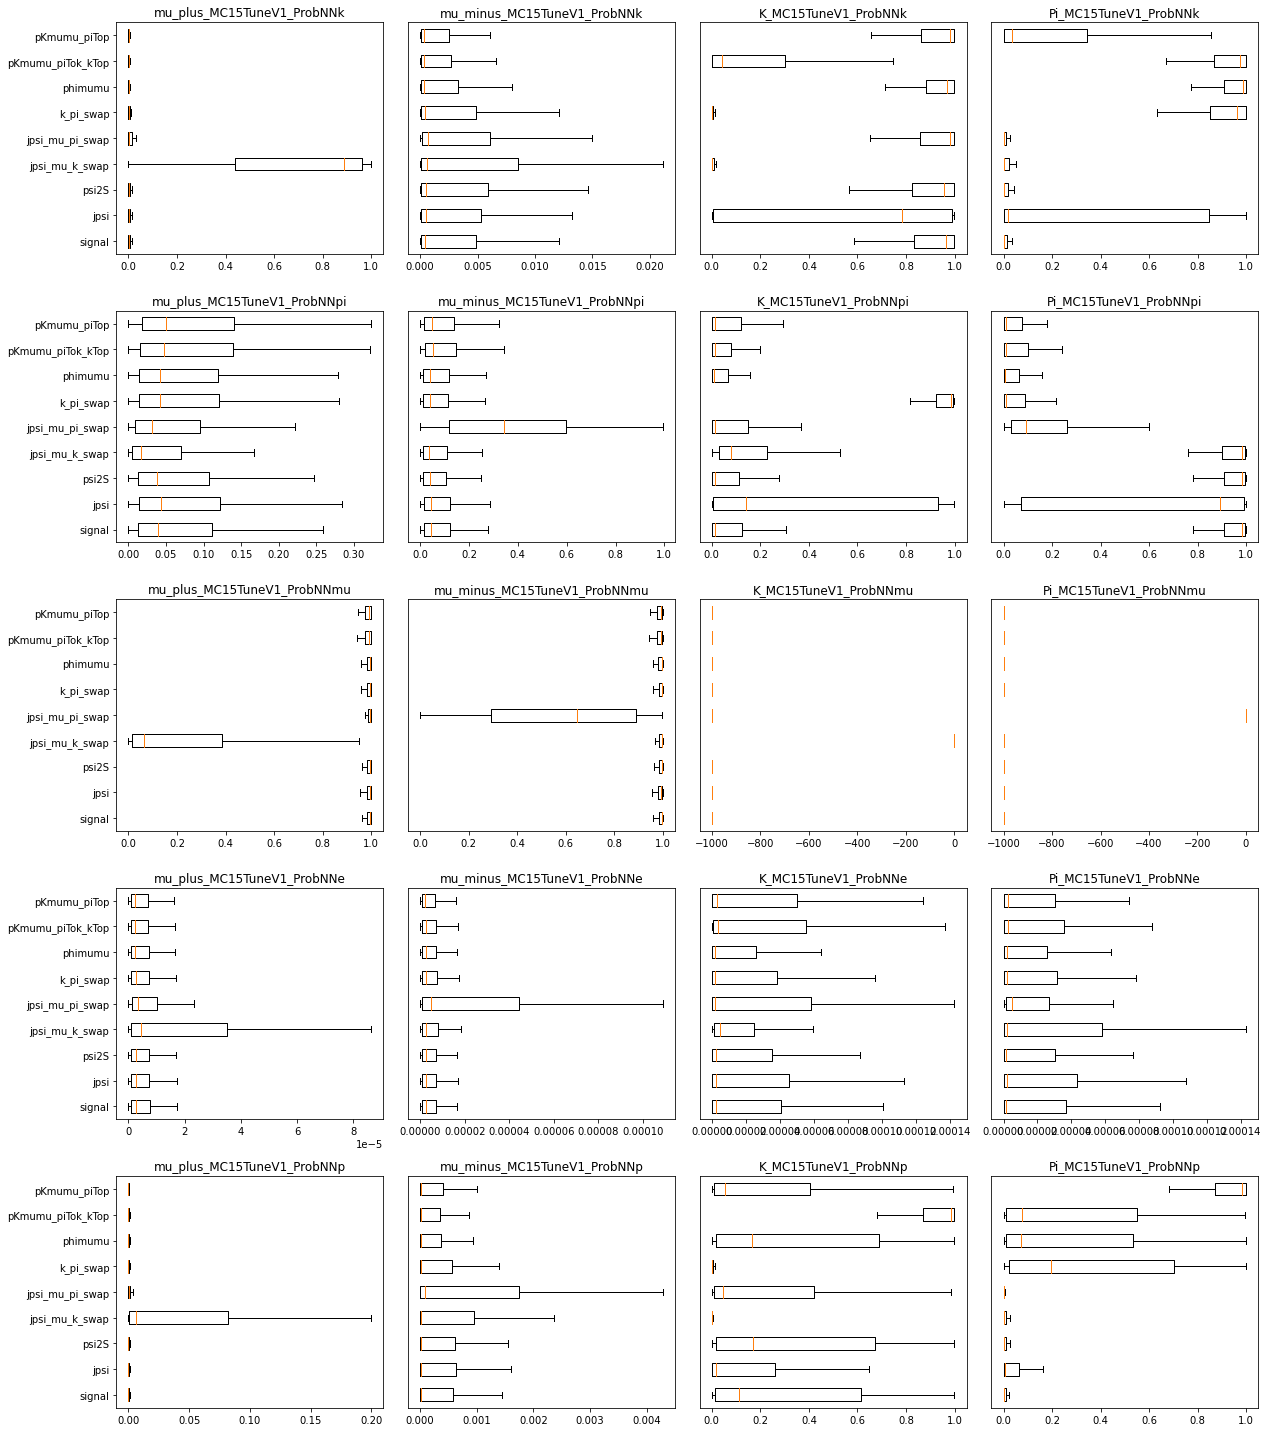

In [91]:
# probabilities
plt.figure(figsize=(18, 20))
plot_whiskers_vars(charged_prods, charged_prods_vars[:5])

plt.tight_layout()
plt.savefig(save_dir + 'charged_probabilities.pdf')

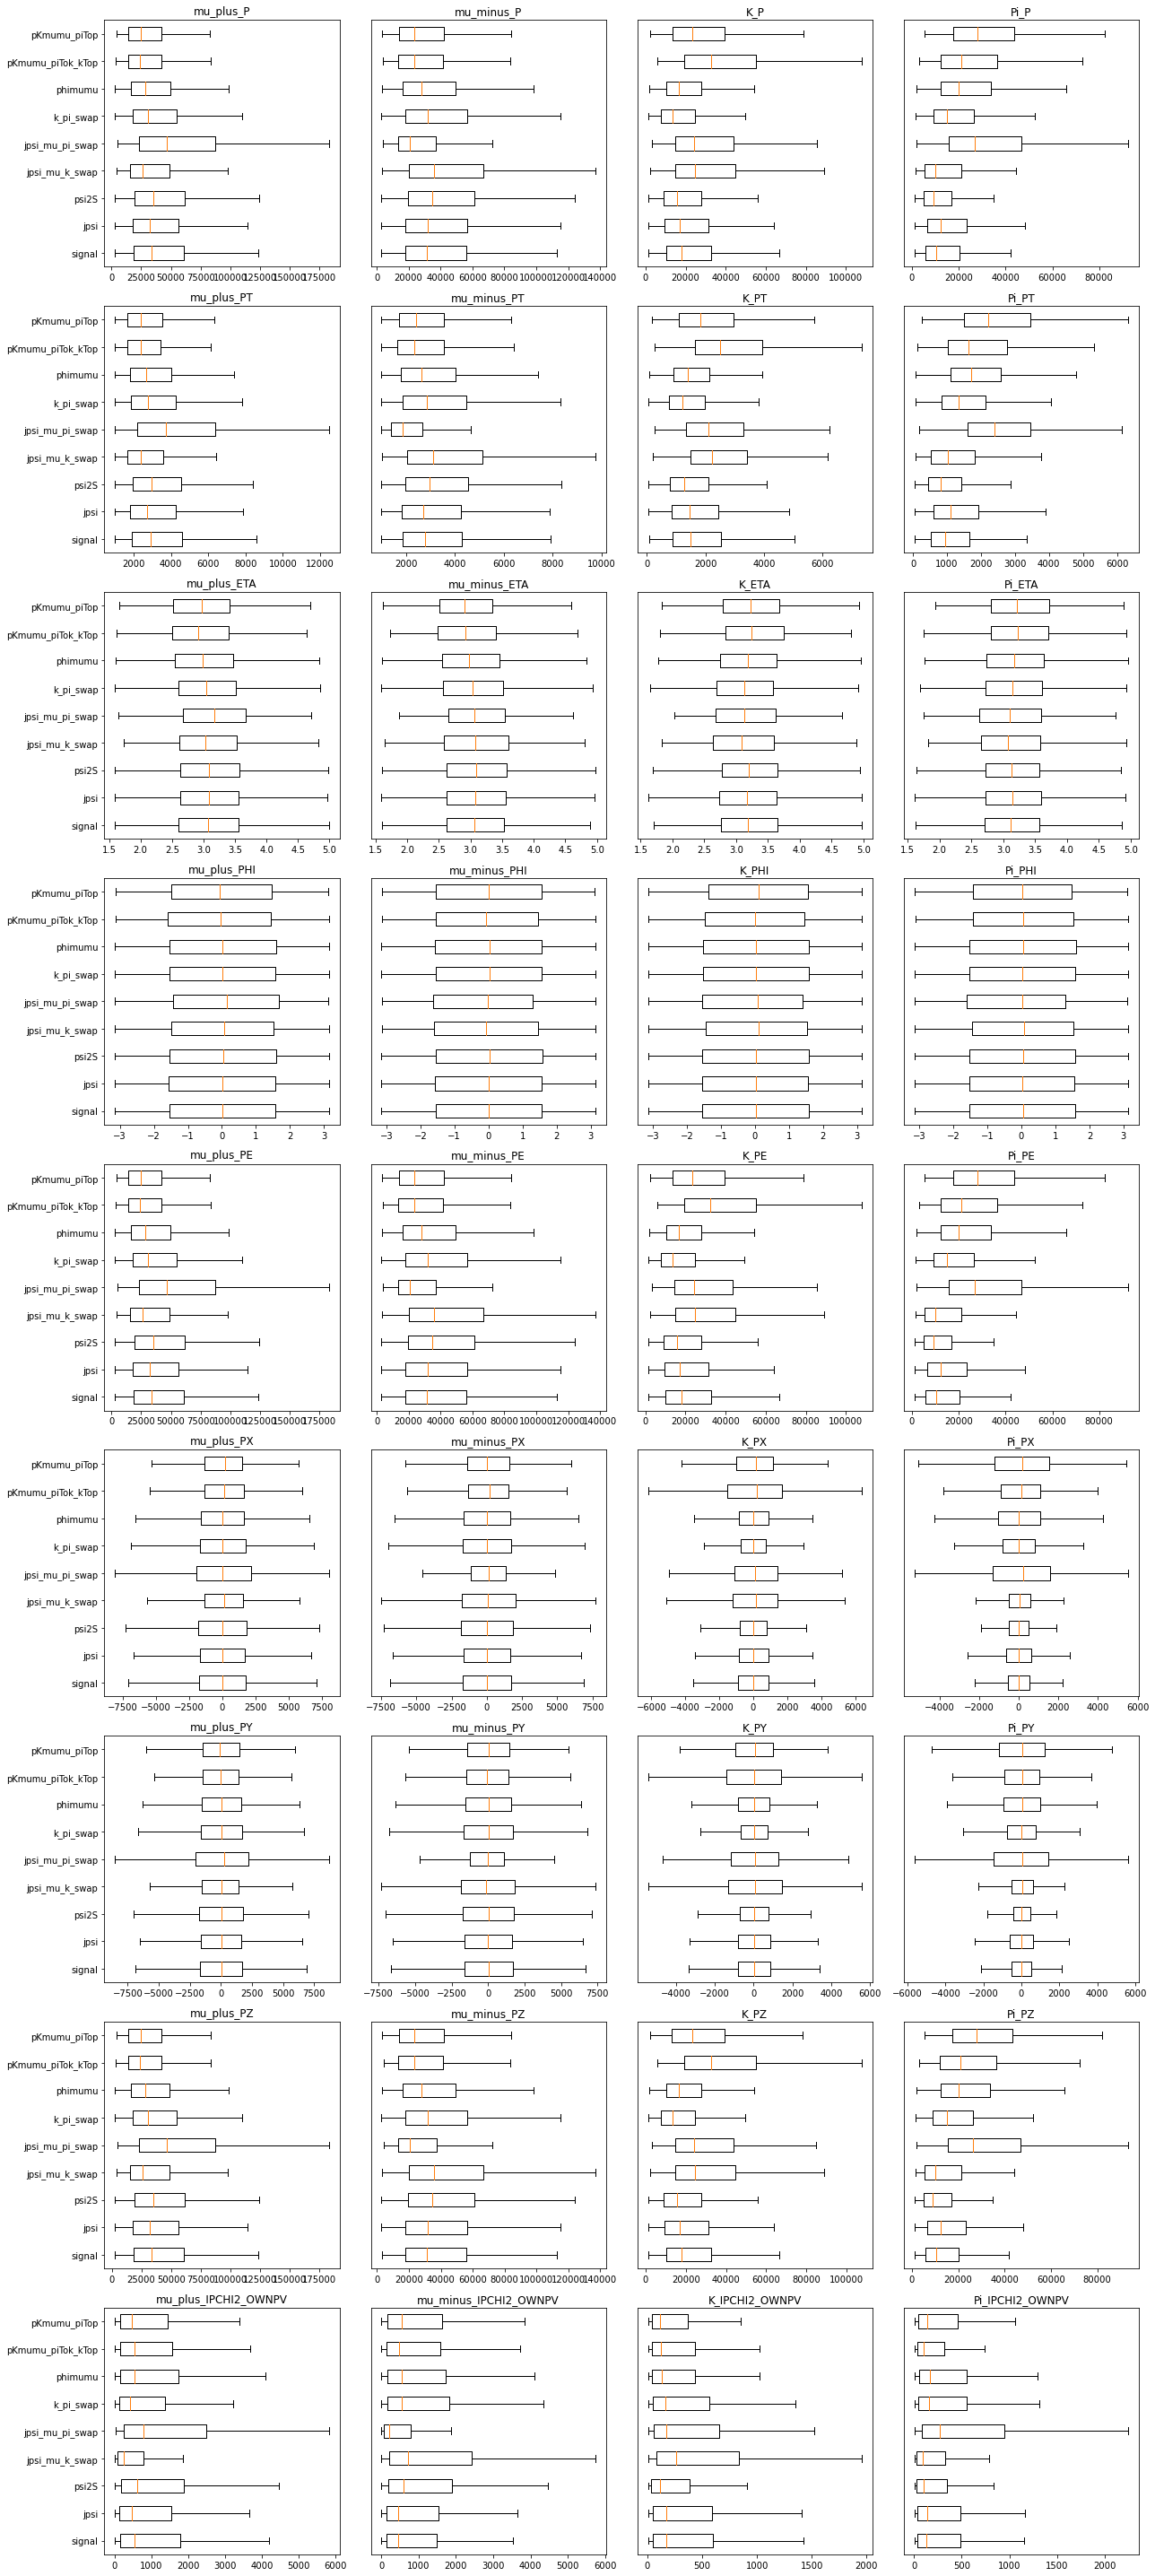

In [92]:
# general momentum, angle, energy
plt.figure(figsize=(18, 40))
plot_whiskers_vars(charged_prods, charged_prods_vars[5:])

plt.tight_layout()
plt.savefig(save_dir + 'charged_general.pdf')

### B0 special

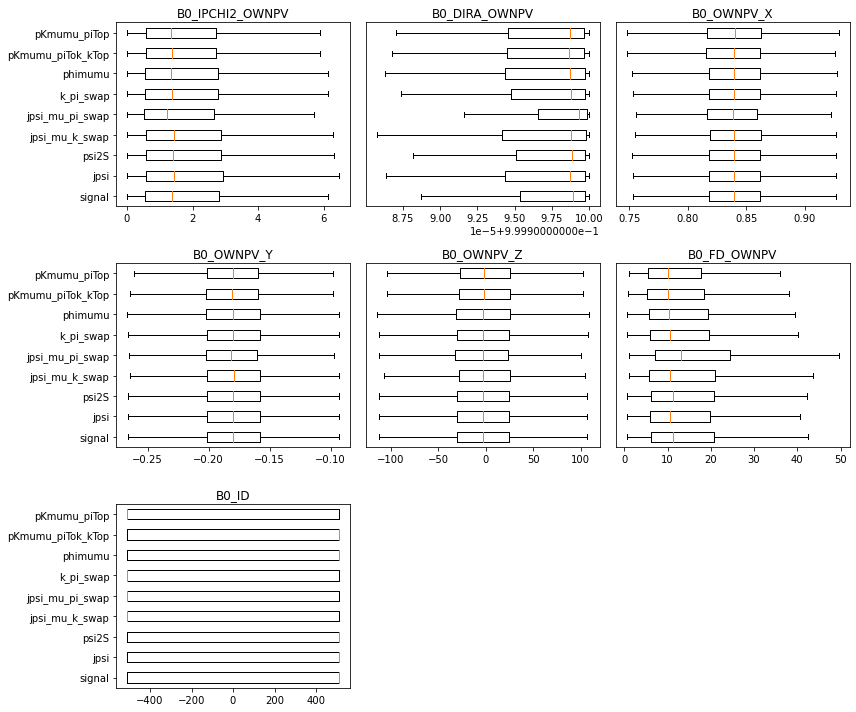

In [95]:
plt.figure(figsize=(12, 10))
plot_whiskers_grid(column_labels[72:79], 3, 3)

plt.tight_layout()
plt.savefig(save_dir + 'B0_other.pdf')